## Importing the basic libraries

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Read the data

The data source is present within sklearn package

The data is the breast cancer data set

We would be predicting the chances that the cancer is malignant

0 is encoded as Malignant and 1 encoded as benign

#### Please note 1 is benign  and 0 is malignant

In [516]:
from sklearn.datasets import load_breast_cancer
cancerData = load_breast_cancer(as_frame=True)

In [517]:
df_cancer = cancerData['frame']

In [518]:
df_cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Let print the description of the data and the features present in the data set

#### Good thing is all the feature variables are numeric so no need of creating dummy variables

In [519]:
print(load_breast_cancer(as_frame=True)["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [520]:
df_cancer.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,0.2790,0.10660,1
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.020360,0.1514,0.06019,...,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585,1
414,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,0.05294,...,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165,0
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,1
544,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,0.1620,0.06688,...,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492,1
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.025940,0.1818,0.06782,...,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134,1
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,1
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,0.1695,0.05916,...,24.04,93.85,624.6,0.13680,0.21700,0.24130,0.08829,0.3218,0.07470,1
105,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.096010,0.1925,0.07692,...,22.40,106.40,827.2,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050,0
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670,0


In [521]:
from sklearn.model_selection import train_test_split
y = df_cancer.pop('target')
X_train,X_test,y_train,y_test = train_test_split(df_cancer,y,train_size=0.7,random_state = 10)

## Step 2: pre processing of data
### Scale the data of the dataframe

In [522]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns = X_train.columns, index =X_train.index)

In [523]:
X_train.shape

(398, 30)

## Step 3: model building by recursive feature elimination
We will use sklearn and stats model api

In [524]:
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

lr = LogisticRegression()
selector = RFE(lr, n_features_to_select=15)
selector = selector.fit(X_train,y_train)

### Lets see the columns

In [525]:
columns_to_select = X_train.columns[selector.support_]
columns_to_select

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'radius error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

### Lets transform on test data 
### We will not fit because fit is only on on train set

In [526]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)


X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,0.401297,0.052249,0.405708,0.251707,0.793635,0.466132,0.476101,0.545229,0.457576,0.436605,...,0.386339,0.122807,0.371483,0.225324,0.558926,0.316486,0.498291,0.637251,0.325448,0.301456
553,0.111316,0.400000,0.105176,0.051113,0.431954,0.125574,0.093627,0.063718,0.319192,0.332772,...,0.068125,0.339001,0.062005,0.027182,0.225982,0.047534,0.068316,0.089431,0.171496,0.123901
374,0.317526,0.196886,0.304402,0.184772,0.330075,0.151907,0.059888,0.100944,0.410101,0.141744,...,0.245820,0.208367,0.242791,0.119298,0.227538,0.171225,0.115043,0.243704,0.346541,0.144103
370,0.443419,0.446713,0.450625,0.295610,0.486478,0.446271,0.424321,0.436034,0.563131,0.257372,...,0.407328,0.500405,0.392898,0.240808,0.468689,0.422183,0.605726,0.784095,0.642421,0.269579
419,0.197785,0.381661,0.187686,0.100445,0.534050,0.138347,0.020982,0.053479,0.280303,0.241786,...,0.157595,0.443455,0.143682,0.067047,0.365228,0.074711,0.030615,0.150192,0.278139,0.106192


In [527]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif_data = pd.DataFrame() 
    vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
    return vif_data

## Lets add constant using statsModel

In [528]:
import statsmodels.api as sm


X_train_sm = X_train[columns_to_select]
X_train_sm = sm.add_constant(X_train_sm)

## Building model using statsmodel

In [529]:
def model(y_train,X_train_sm):
    lm = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial()).fit()
    print(lm.summary())

## Lets observe the correlations between features

Higly corelated features are responsible for multicoliniarity

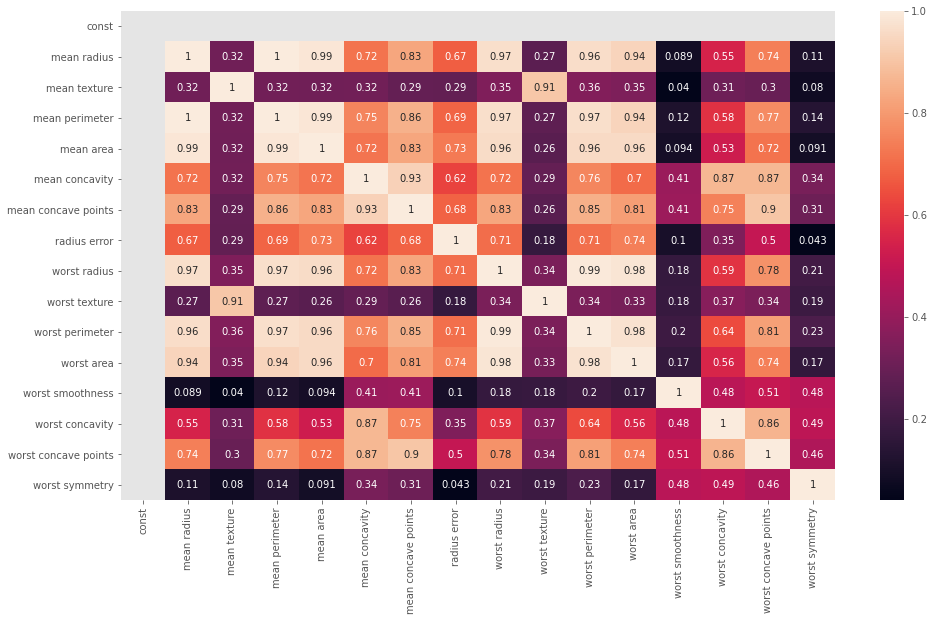

In [530]:
plt.figure(figsize=(16,9))
sns.heatmap(X_train_sm.corr(),annot=True)

## Let us observe the summary statistics
- The p-value threshold chosen is 0.05
- The features with the p value above `0.05` will be dropped
- we will be dropping it one by one

In [531]:
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      382
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.174
Date:                Sat, 16 Jan 2021   Deviance:                       38.347
Time:                        23:33:59   Pearson chi2:                     92.0
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.2491 

#### Let us drop the `worst symmetry` feature and re build the model

In [532]:
X_train_sm = X_train_sm.drop("worst symmetry",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      383
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.215
Date:                Sat, 16 Jan 2021   Deviance:                       38.429
Time:                        23:33:59   Pearson chi2:                     85.2
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.2627 

## Let us observe the vifs

In [533]:
VIF(X_train_sm)

,feature,VIF
0,const,51.122291
1,mean radius,2063.316052
2,mean texture,7.745637
3,mean perimeter,1859.522554
4,mean area,222.880468
5,mean concavity,43.201399
6,mean concave points,36.121260
7,radius error,4.527898
8,worst radius,441.156161
9,worst texture,8.200260


### Lets drop `mean radius`
1. The `mean radius` has high vif as well as high p value
2. Let us drop the feature
3. Lets re run the model

In [534]:
X_train_sm = X_train_sm.drop("mean radius",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      384
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.487
Date:                Sat, 16 Jan 2021   Deviance:                       38.974
Time:                        23:34:00   Pearson chi2:                     78.0
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.9558 

## Again lets observe the vif

In [535]:
VIF(X_train_sm)

,feature,VIF
0,const,43.367086
1,mean texture,7.745616
2,mean perimeter,275.393634
3,mean area,179.222583
4,mean concavity,37.818776
5,mean concave points,35.932468
6,radius error,4.354298
7,worst radius,231.094370
8,worst texture,8.199050
9,worst perimeter,141.538524


### Worst Area has a large p value let us drop that

In [536]:
X_train_sm = X_train_sm.drop("worst area",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      385
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.537
Date:                Sat, 16 Jan 2021   Deviance:                       39.073
Time:                        23:34:01   Pearson chi2:                     84.1
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.8623 

In [537]:
VIF(X_train_sm)

,feature,VIF
0,const,41.356448
1,mean texture,7.743156
2,mean perimeter,83.389187
3,mean area,57.986976
4,mean concavity,35.143310
5,mean concave points,35.903622
6,radius error,4.161271
7,worst radius,116.502293
8,worst texture,8.183086
9,worst perimeter,123.750974


## Now let us drop mean texture and observe the summary vif

In [538]:
X_train_sm = X_train_sm.drop("mean texture",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      386
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.771
Date:                Sat, 16 Jan 2021   Deviance:                       39.542
Time:                        23:34:01   Pearson chi2:                     78.9
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.4240 

In [539]:
VIF(X_train_sm)

,feature,VIF
0,const,41.336604
1,mean perimeter,81.066929
2,mean area,57.480798
3,mean concavity,34.943881
4,mean concave points,35.899922
5,radius error,3.950890
6,worst radius,116.376855
7,worst texture,1.282011
8,worst perimeter,123.313875
9,worst smoothness,2.141263


## Now let us drop mean concavity and observe the summary and vif

In [540]:
X_train_sm = X_train_sm.drop("mean concavity",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      387
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.006
Date:                Sat, 16 Jan 2021   Deviance:                       40.012
Time:                        23:34:02   Pearson chi2:                     102.
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.2917 

In [541]:
VIF(X_train_sm)

,feature,VIF
0,const,41.264269
1,mean perimeter,80.773841
2,mean area,57.251092
3,mean concave points,13.940851
4,radius error,3.435760
5,worst radius,108.690396
6,worst texture,1.279268
7,worst perimeter,122.518390
8,worst smoothness,2.093067
9,worst concavity,4.836536


## Now let us drop worst perimeter and observe the summary and vif

In [542]:
X_train_sm = X_train_sm.drop("worst perimeter",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      388
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.450
Date:                Sat, 16 Jan 2021   Deviance:                       40.899
Time:                        23:34:03   Pearson chi2:                     83.7
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.5888 

In [543]:
VIF(X_train_sm)

,feature,VIF
0,const,40.802958
1,mean perimeter,79.503887
2,mean area,57.187162
3,mean concave points,13.940851
4,radius error,3.334514
5,worst radius,24.901930
6,worst texture,1.278486
7,worst smoothness,2.061750
8,worst concavity,4.406523
9,worst concave points,13.923978


## Now let us drop worst smoothness and observe the summary and vif

In [544]:
X_train_sm = X_train_sm.drop("worst smoothness",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      389
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.088
Date:                Sat, 16 Jan 2021   Deviance:                       42.175
Time:                        23:34:03   Pearson chi2:                     64.6
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.5685 

In [545]:
VIF(X_train_sm)

,feature,VIF
0,const,25.024382
1,mean perimeter,68.722045
2,mean area,56.093288
3,mean concave points,12.594990
4,radius error,3.241061
5,worst radius,23.717251
6,worst texture,1.278438
7,worst concavity,4.406473
8,worst concave points,13.361525


## Now let us drop worst concave points and observe the summary and vif

In [546]:
X_train_sm = X_train_sm.drop("worst concave points",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      390
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.660
Date:                Sat, 16 Jan 2021   Deviance:                       45.319
Time:                        23:34:04   Pearson chi2:                     65.5
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.9958    

In [547]:
VIF(X_train_sm)

,feature,VIF
0,const,23.698965
1,mean perimeter,68.720253
2,mean area,53.362932
3,mean concave points,7.169522
4,radius error,3.016626
5,worst radius,18.863225
6,worst texture,1.278147
7,worst concavity,3.017655


## now that the p-values are brought down below 0.05 we will drop feature with high vif that is mean perimeter

In [548]:
X_train_sm = X_train_sm.drop("mean perimeter",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      391
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.007
Date:                Sat, 16 Jan 2021   Deviance:                       60.015
Time:                        23:34:05   Pearson chi2:                     198.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  27.2212    

In [549]:
VIF(X_train_sm)

,feature,VIF
0,const,7.189085
1,mean area,15.797707
2,mean concave points,6.358778
3,radius error,2.406083
4,worst radius,15.205522
5,worst texture,1.259135
6,worst concavity,3.000039


## Let us drop mean area

In [550]:
X_train_sm = X_train_sm.drop("mean area",axis=1)
X_train_sm.columns
model(y_train,X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      392
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.298
Date:                Sat, 16 Jan 2021   Deviance:                       68.595
Time:                        23:34:05   Pearson chi2:                     242.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.8606    

In [551]:
VIF(X_train_sm)

,feature,VIF
0,const,7.047984
1,mean concave points,5.769623
2,radius error,2.368059
3,worst radius,3.829453
4,worst texture,1.235922
5,worst concavity,2.771284


## observation:

- The vif are below 6 which is good
- constant has 7 which we ignore as vif is only for `features` and not for constant
- multi colinearity is taken care

## Step 4: Evaluation of the model
We will be using confusion matrix for that

In [552]:
from sklearn.metrics import classification_report, confusion_matrix

## add constant to X_test
X_test_sm = sm.add_constant(X_test)

## Lets only include the final features on test set
X_test_sm = X_test_sm[X_train_sm.columns]

## Re runing the final model on train set
lm = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial()).fit()

## Lets predict on test set
y_test_pred = lm.predict(X_test_sm)

#### The output is the probability of the patient having breast cancer. We now need to choose the cutoff probability to classify the patient correctly we will observe the same using ROC curve

We will make predictions based on different cutoffs and decide which cutoff is the best fit for our model



In [568]:
### generate cutoff probabil
cutoffs = np.arange(0.0,1.0,0.1)
## Lets form the data frame of predicted outputs outputs 

resultFrame = pd.DataFrame()
##Round the predicted outputs to 2 decimals
y_test_pred = round(y_test_pred,4)

for cutoff in cutoffs:
    
    ## Predicting based on cutoff and storing as a column
    resultFrame[str(round(cutoff,2))] = y_test_pred.apply(lambda x: 1 if x>=round(cutoff,2) else 0) 

## Adding the actual value as the last column of the data frame   which is the y_test series 
resultFrame['TrueValue'] = y_test

In [569]:
resultFrame.head(10)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,TrueValue
172,1,0,0,0,0,0,0,0,0,0,0
553,1,1,1,1,1,1,1,1,1,1,1
374,1,1,1,1,1,1,1,1,1,1,1
370,1,0,0,0,0,0,0,0,0,0,0
419,1,1,1,1,1,1,1,1,1,1,1
152,1,1,1,1,1,1,1,1,1,0,1
550,1,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,1
264,1,0,0,0,0,0,0,0,0,0,0
214,1,0,0,0,0,0,0,0,0,0,0


### Confusion matrix here is

<table class="table table-dark">
    <tr><td>True Positive</td> <td>False Negative</td></tr>
    <tr><td>False Positive</td> <td>True Negative</td></tr>
</table>

### We will use the above layout to determine True positive false positive true negative false negative

### So now we will observe the confusion matrices for cutoffs ranging from 0.0 to 0.9 and see which cutoff classifies better

In [570]:
for col in resultFrame.columns: 
    if(col!='TrueValue'):
        matrix =  confusion_matrix(resultFrame['TrueValue'],resultFrame[col])
        print("confusion matrix for cutoff = {0}".format(col))
        print(matrix)

confusion matrix for cutoff = 0.0
[[  0  59]
 [  0 112]]
confusion matrix for cutoff = 0.1
[[ 54   5]
 [  1 111]]
confusion matrix for cutoff = 0.2
[[ 56   3]
 [  4 108]]
confusion matrix for cutoff = 0.3
[[ 57   2]
 [  4 108]]
confusion matrix for cutoff = 0.4
[[ 58   1]
 [  4 108]]
confusion matrix for cutoff = 0.5
[[ 58   1]
 [  5 107]]
confusion matrix for cutoff = 0.6
[[ 58   1]
 [  5 107]]
confusion matrix for cutoff = 0.7
[[ 58   1]
 [  7 105]]
confusion matrix for cutoff = 0.8
[[ 59   0]
 [  8 104]]
confusion matrix for cutoff = 0.9
[[ 59   0]
 [ 12 100]]


## Observation:
From the confusion matrices printed above we can infer that 0.3 , 0.4 , 0.5 can be chosen as the cutoff as it has low number of misclassifications 

## Lets plot the ROC curve 

- X-Axis False Positive rate
- Y-Axis is True Positive rate

Text(0.5, 1.0, 'ROC curve')

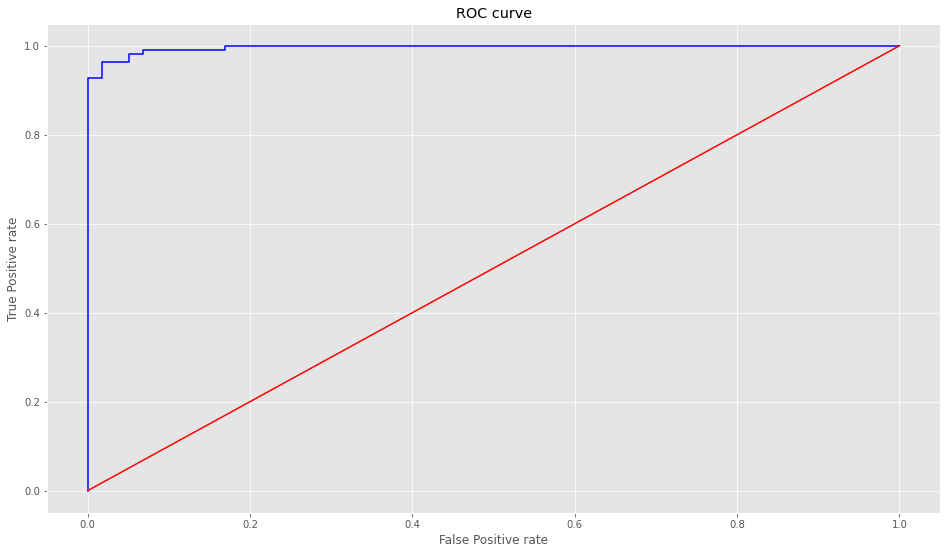

In [571]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_test_pred)
plt.plot(false_positive_rate1,true_positive_rate1,c='b')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")

### Lets plot accuracy sensitivity and specificity Tradeoff,
- We are observiong the behavior of accuracy sensitivity and specificity based on cutoff


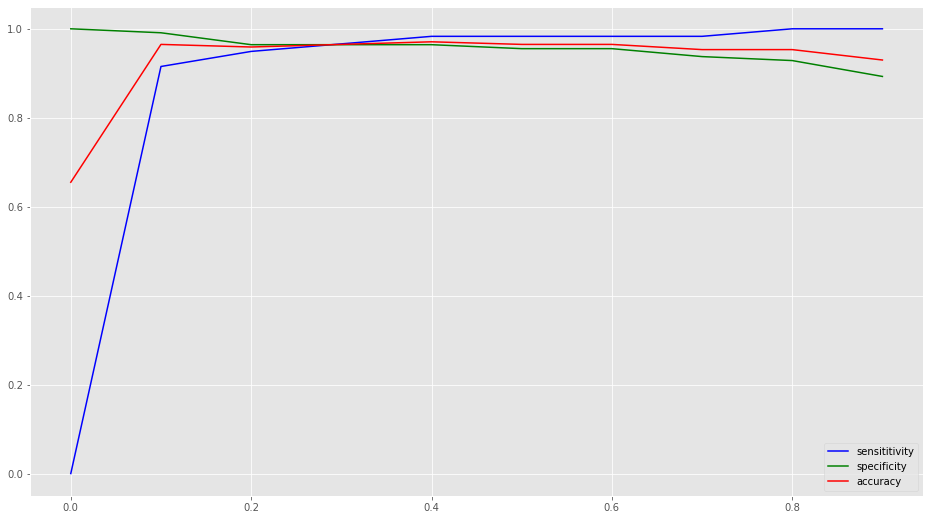

In [572]:

accuracy = []
sensitivity = []
specificity = []
for col in resultFrame.columns: 
    if(col != 'TrueValue'):
        matrix =  confusion_matrix(resultFrame['TrueValue'],resultFrame[col])
        sens = matrix[0,0]/(matrix[0,0]+matrix[0,1])
        spec = matrix[1,1]/(matrix[1,1]+matrix[1,0])
        acc = (matrix[1,1]+matrix[0,0])/(matrix[1,1]+matrix[1,0]+matrix[0,1]+matrix[0,0])
        accuracy.append(acc)
        sensitivity.append(sens)
        specificity.append(spec)

#### Now plotting the roc curve

plt.figure(figsize=(16,9))

plt.plot(cutoffs,sensitivity ,c='b')
plt.plot(cutoffs,specificity ,c='g')
plt.plot(cutoffs,accuracy ,c='r')
plt.legend(['sensititivity','specificity','accuracy'],loc=0)

## Observation:
We can obser ve here that the cutoff 0.3 seems to be best for our model

## Lets observe precision recall tradeoff


<ipython-input-573-120d869cfbbf>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  pre = matrix[0,0]/(matrix[0,0]+matrix[1,0])


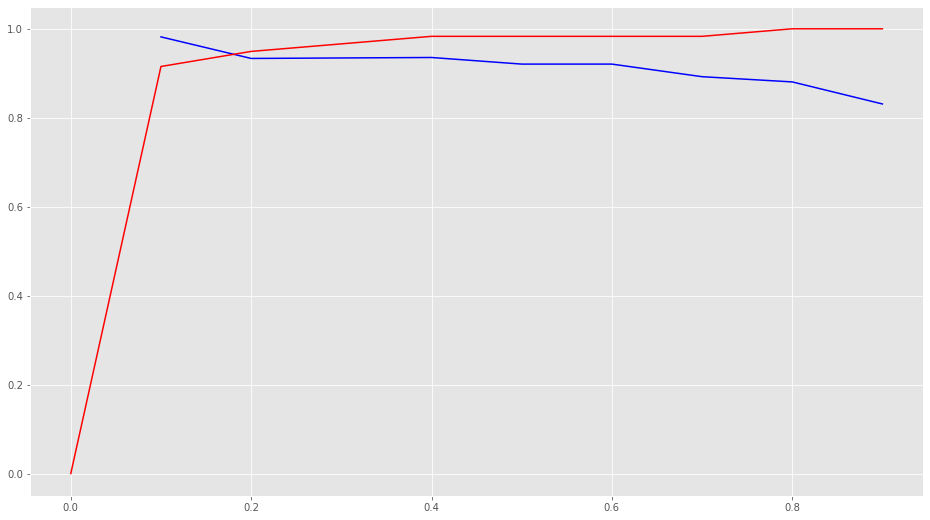

In [573]:

precision = []
recall = []
for col in resultFrame.columns: 
    if(col != 'TrueValue'):
        matrix =  confusion_matrix(resultFrame['TrueValue'],resultFrame[col])
        re = matrix[0,0]/(matrix[0,0]+matrix[0,1])
        pre = matrix[0,0]/(matrix[0,0]+matrix[1,0])
        recall.append(re)
        precision.append(pre)

#### Now plotting the roc curve

plt.figure(figsize=(16,9))

plt.plot(cutoffs,precision ,c='b')
plt.plot(cutoffs,recall ,c='r')

# Step5: Making a call

## Now let us choose the cutoff as 0.3 based on our analysis

- The probabily below 0.3 is encoded as 0 which means malignant
- The probability is higher than 0.3 is encoded as 1 which is benign 
- Later we will observe the final confusion matrix
- Accuracy, Sensitivity, Specificity of the final model

In [574]:
y_test_pred_final = y_test_pred.apply(lambda x: 1 if x>=0.3 else 0)

## Now we will make the confusion matrix

cf_final = confusion_matrix(y_test,y_test_pred_final)
cf_final

array([[ 57,   2],
       [  4, 108]], dtype=int64)

## Lets print accuracy , Specificity and sensitivity

In [575]:
accuracy = (cf_final[0,0]+cf_final[1,1])/(cf_final[0,0]+cf_final[1,1] + cf_final[1,0] + cf_final[0,1])

sensitivity = cf_final[0,0]/(cf_final[0,0] + cf_final[0,1])

specificity = cf_final[1,1]/(cf_final[1,1] + cf_final[1,0])

print("sensitivity is ",sensitivity)
print("specificity is ",specificity)
print("accuracy is ",accuracy)

sensitivity is  0.9661016949152542
specificity is  0.9642857142857143
accuracy is  0.9649122807017544


## Inferences
### Cheers the model is 96% accurate on test set kudos 



- All the three parameters are 0.96 high for cutoff 0.3
- As per our confision matrix only 6 points were misclassified rest all were correctly classified
- If the predicted probability is less 0.3 It is highly likely the person is suffering from breast cancer which is malignant
- If the probability is greater than or 0.3 Then we can intute as benign 